In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'similarity_bigmatrix_ALL'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
# use `save_worspace(db)` to save variables at the end
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing', session='',
                          func=lambda x: x):
    all_of_them = {}
    for ani in animal_list:
        try:
            folder = '../%s/%s/notebooks/autorestore/%s/' % (ani, session, notebook)
            all_of_them.update({ani: func(ut.load_variable(varname, folder))})
        except IOError:
            print "Nope: %s, %s, %s" % (ani, session, varname)
    return all_of_them

In [7]:
#vhpc_animals = [ani for ani in animals if ani[0]!='d']
vhpc_expo_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
vhpc_pre_animals =  '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
vhpc_post_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
vhpc_post_hiatus_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'

dhpc_expo_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
dhpc_pre_animals =  'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
dhpc_post_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
dhpc_post_hiatus_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'

In [10]:
delta_t05s = 0.5
t_start05s = -5.5 
t_stop05s = 10.5

delta_t1s = 1
t_start1s = -5 
t_stop1s  = 11 

delta_t15s = 1
t_start15s = -5.5 
t_stop15s = 10.5  

delta_t2s = 2
t_start2s = -4
t_stop2s  = 10

In [11]:
regions = 'dhpc','vhpc'
sessions = 'expo','pre','post','post_hiatus'
#durations=([0,1],[1,2],[2,3],[3,4],[4,5],[5,6])
bins = ['05s','1s','15s','2s']
bin_ranges=[]
for tb in bins:
    if tb == '05s':
        div=0.5
    elif tb=='15s':
        div=1.0
    else:
        div=tb[:-1]
    bin_ranges.append(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
classes = range(1,5)

In [12]:
bin_ranges

[32, 16, 16, 7]

In [13]:
for reg in regions:
    for sess in sessions:
        for var in ('time_ax', 'traces', 'events', 'cycles',
            'is_STIM1t', 'is_STIM2t', 'is_STIM3t', 'is_STIM4t','CYCLE_START', 'CS_DURATION', 'DELAY'):
            exec ('%s_%s_%s = {}'%(var,reg, sess))
            for ani in eval('%s_%s_animals'%(reg,sess)):
                if sess == 'expo':
                    folder = '../%s/4_odor_expo/notebooks/autorestore/preprocessing'%(ani)
                else:
                    folder = '../%s/%s/notebooks/autorestore/preprocessing'%(ani,sess)
                try:
                    eval('%s_%s_%s'%(var,reg,sess)).update({ani: ut.load_variable(var, folder)})
                except IOError:
                    print 'error'
                    continue

In [10]:
for reg in regions:
    for sess in sessions:
        exec("labels_%s_%s = dict(zip(%s_%s_animals, [ut.load_variable('labels_%s',\
                                    '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                    for ani in %s_%s_animals]))"%(reg,sess, reg,sess, sess, reg,sess))

In [11]:
for reg in regions:
    for tb in bins:
        for sess in sessions:
            try:
                exec("patterns_%s_%s_%s = dict(zip(%s_%s_animals, [ut.load_variable('patterns_evs_%s_%s',\
                                                                   '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                          for ani in %s_%s_animals]))"%(reg,tb,sess,reg,sess,tb,sess,reg,sess))
            except:
                print 'nope %s %s'%(tb,sess)

for reg in 'dhpc','vhpc':
    for sess in 'pre', 'post':
        exec("patterns_tb_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('patterns_tb',\
                                                               '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, sess, reg))
        exec("labels_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('labels',\
                                                             '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, sess, reg))

#have to extract 4_odor_expo varibles differently from that used above
for reg in 'dhpc','vhpc':
    for sess in 'expo',:
        exec("patterns_tb_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('patterns_tb',\
                                                               '../%%s/4_odor_expo/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, reg))
        exec("labels_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('labels',\
                                                             '../%%s/4_odor_expo/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, reg))

#since c3m1 pre tb0 started at -4 (instead of -5), make a -5 tb by taking average of tb of -4 thru -2 (likely just noise anyway)
avg_tb = patterns_tb_pre_vhpc['c3m1'][:3].mean(0)
patterns_tb_pre_vhpc['c3m1'] = list(patterns_tb_pre_vhpc['c3m1'])
patterns_tb_pre_vhpc['c3m1'].append(avg_tb)

for x in range(len(patterns_tb_pre_vhpc['c3m1'])-2,-1,-1):
    patterns_tb_pre_vhpc['c3m1'][x+1]=patterns_tb_pre_vhpc['c3m1'][x]

patterns_tb_pre_vhpc['c3m1'][0] = np.mean(patterns_tb_pre_vhpc['c3m1'][1:4],0)

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
for t in range(16): # number of time bins in 1s binned data
    for reg in 'dhpc','vhpc':
        for sess in sessions:
            exec("scaled_patterns_%s_1s_%s_%s = {}"%(reg,sess,t))
            for ani in eval("patterns_%s_1s_%s"%(reg,sess)):
                exec("scaled_patterns_%s_1s_%s_%s[ani] = StandardScaler().fit_transform(patterns_%s_1s_%s[ani][t])"%(reg,sess,t,reg,sess))
            #print normalized_patterns_tb_post

In [78]:
#from sklearn.preprocessing import StandardScaler
#patterns = load_all_animals_vars('patterns_tb[5]', all_animals, notebook='decoding_around_onset', session='post',
#                                     func=lambda x: StandardScaler().fit_transform(x))
#labels = load_all_animals_vars('labels', all_animals, notebook='decoding_around_onset', session='post')

#just look at trace tb here for post session (to compare to working nb)
pattern_ids = range(1, 5)
for reg in 'dhpc','vhpc':
    for t in range(16)):
        exec("res_tb%s_%s = {}"%(t,reg))
        for ani in eval("patterns_tb_post_%s.keys()"%(reg)):
            all_patterns = [eval("patterns_tb_post_%s[ani][t][labels_post_%s[ani]==i]"%(reg,reg)) for i in range(1, 5)]
            corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_patterns)
            exec("res_tb%s_%s[ani] = corrmat_distr"%(t,reg))
            print ".",

In [15]:
##SCALING APPLIED, all tbs
pattern_ids = range(1, 5)
for reg in 'dhpc','vhpc':
    for sess in sessions:
        for t in range(16):
            exec("scaled_res_%s_1s_%s_%s = {}"%(reg,sess,t))
            for ani in eval("scaled_patterns_%s_1s_%s_%s.keys()"%(reg,sess,t)):
                all_scaled_patterns = [eval("scaled_patterns_%s_1s_%s_%s[ani][labels_%s_%s[ani]==i]"%(reg,sess,t,reg,sess)) for i in range(1, 5)]
                corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_scaled_patterns)
                exec("scaled_res_%s_1s_%s_%s[ani] = corrmat_distr"%(reg,sess,t))
                print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [18]:
for reg in 'dhpc','vhpc':
    for sess in sessions:
        for t in range(16):
            #exec("values_tb%s_post_%s = np.r_[[[np.mean(res_tb%s_%s[ani][(p1, p2)]) for ani in post_animals_%s]\
            #                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)"%(t,reg,t,reg,reg))
            exec("scaled_values_%s_1s_%s_%s = np.r_[[[np.mean(scaled_res_%s_1s_%s_%s[ani][(p1, p2)]) for ani in %s_%s_animals]\
                            for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)"%(reg,sess,t,reg,sess,t,reg,sess))

t = 8 #which tb do you wanna look at?
fig, axs = pl.subplots(4, 3, figsize=(3,3),sharex=True, sharey=True)
for ani, ax in zip(patterns_tb_post_vhpc.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(eval("res_tb%s_vhpc"%(t))[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.suptitle('No preprocessing',y=1.05)
fig.colorbar(im, cax=ax)
fig.tight_layout()

t=8 # which time bin you wanna plot?

fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(eval("values_tb%s_post_vhpc"%(t)), origin='lower', aspect='equal', vmin=-0.02, vmax=0.2, cmap=pl.cm.viridis)

# pt.nicer_plot(ax)
ax.set_xlim(-0.5, eval("values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_xticks(range(eval("values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_xticklabels(pattern_ids)
ax.set_ylim(-0.5, eval("values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_yticks(range(eval("values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_yticklabels(pattern_ids)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')
ax.set_title('Post (Ventral), no preprocessing')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../img/%s_vhpc.jpg'%NOTEBOOK_NAME)

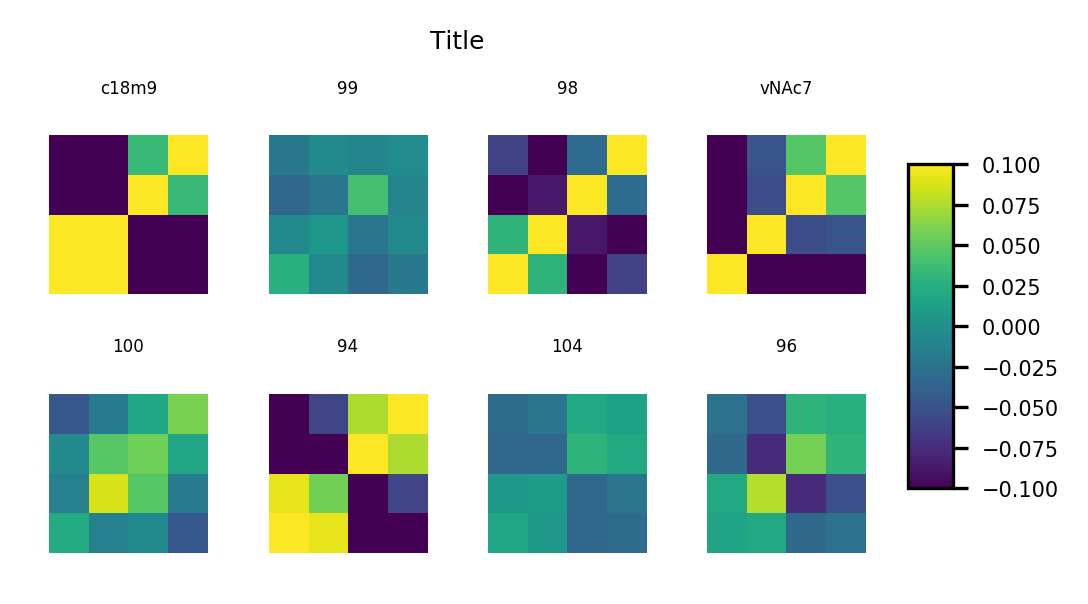

In [103]:
t = 5 #which tb do you wanna look at?
fig, axs = pl.subplots(2, 4, figsize=(3,1.8),sharex=True, sharey=True)
for ani, ax in zip(patterns_vhpc_1s_post.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(eval("scaled_res_vhpc_1s_post_%s"%(t))[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.suptitle('Title',y=1.05)
fig.colorbar(im, cax=ax)
fig.tight_layout()

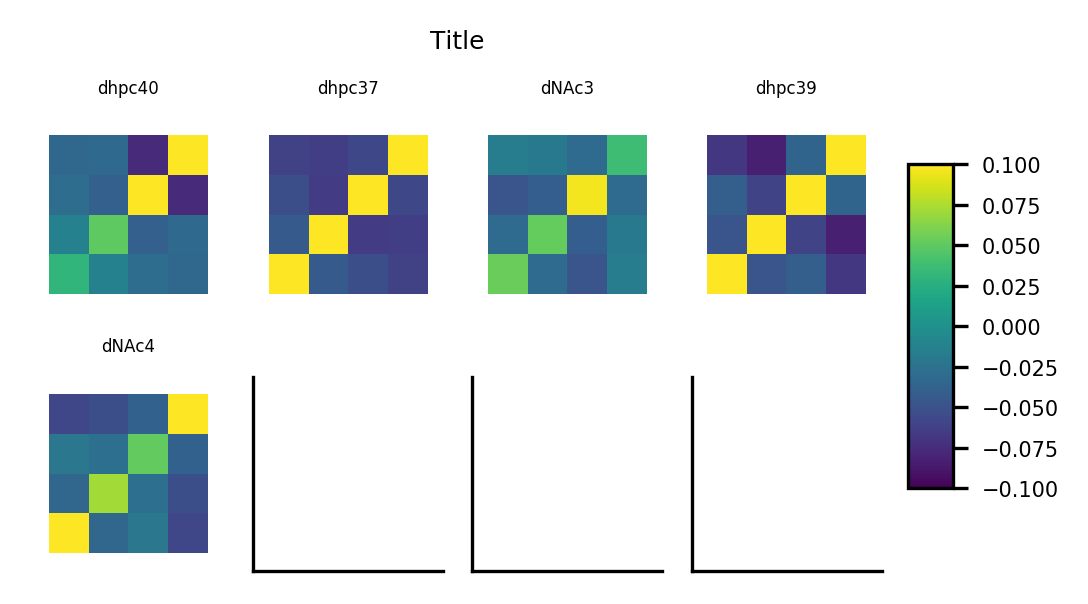

In [51]:
t = 5 #which tb do you wanna look at?
fig, axs = pl.subplots(2, 4, figsize=(3,1.8),sharex=True, sharey=True)
for ani, ax in zip(patterns_dhpc_1s_post.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(eval("scaled_res_dhpc_1s_pre_%s"%(t))[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.suptitle('Title',y=1.05)
fig.colorbar(im, cax=ax)
fig.tight_layout()

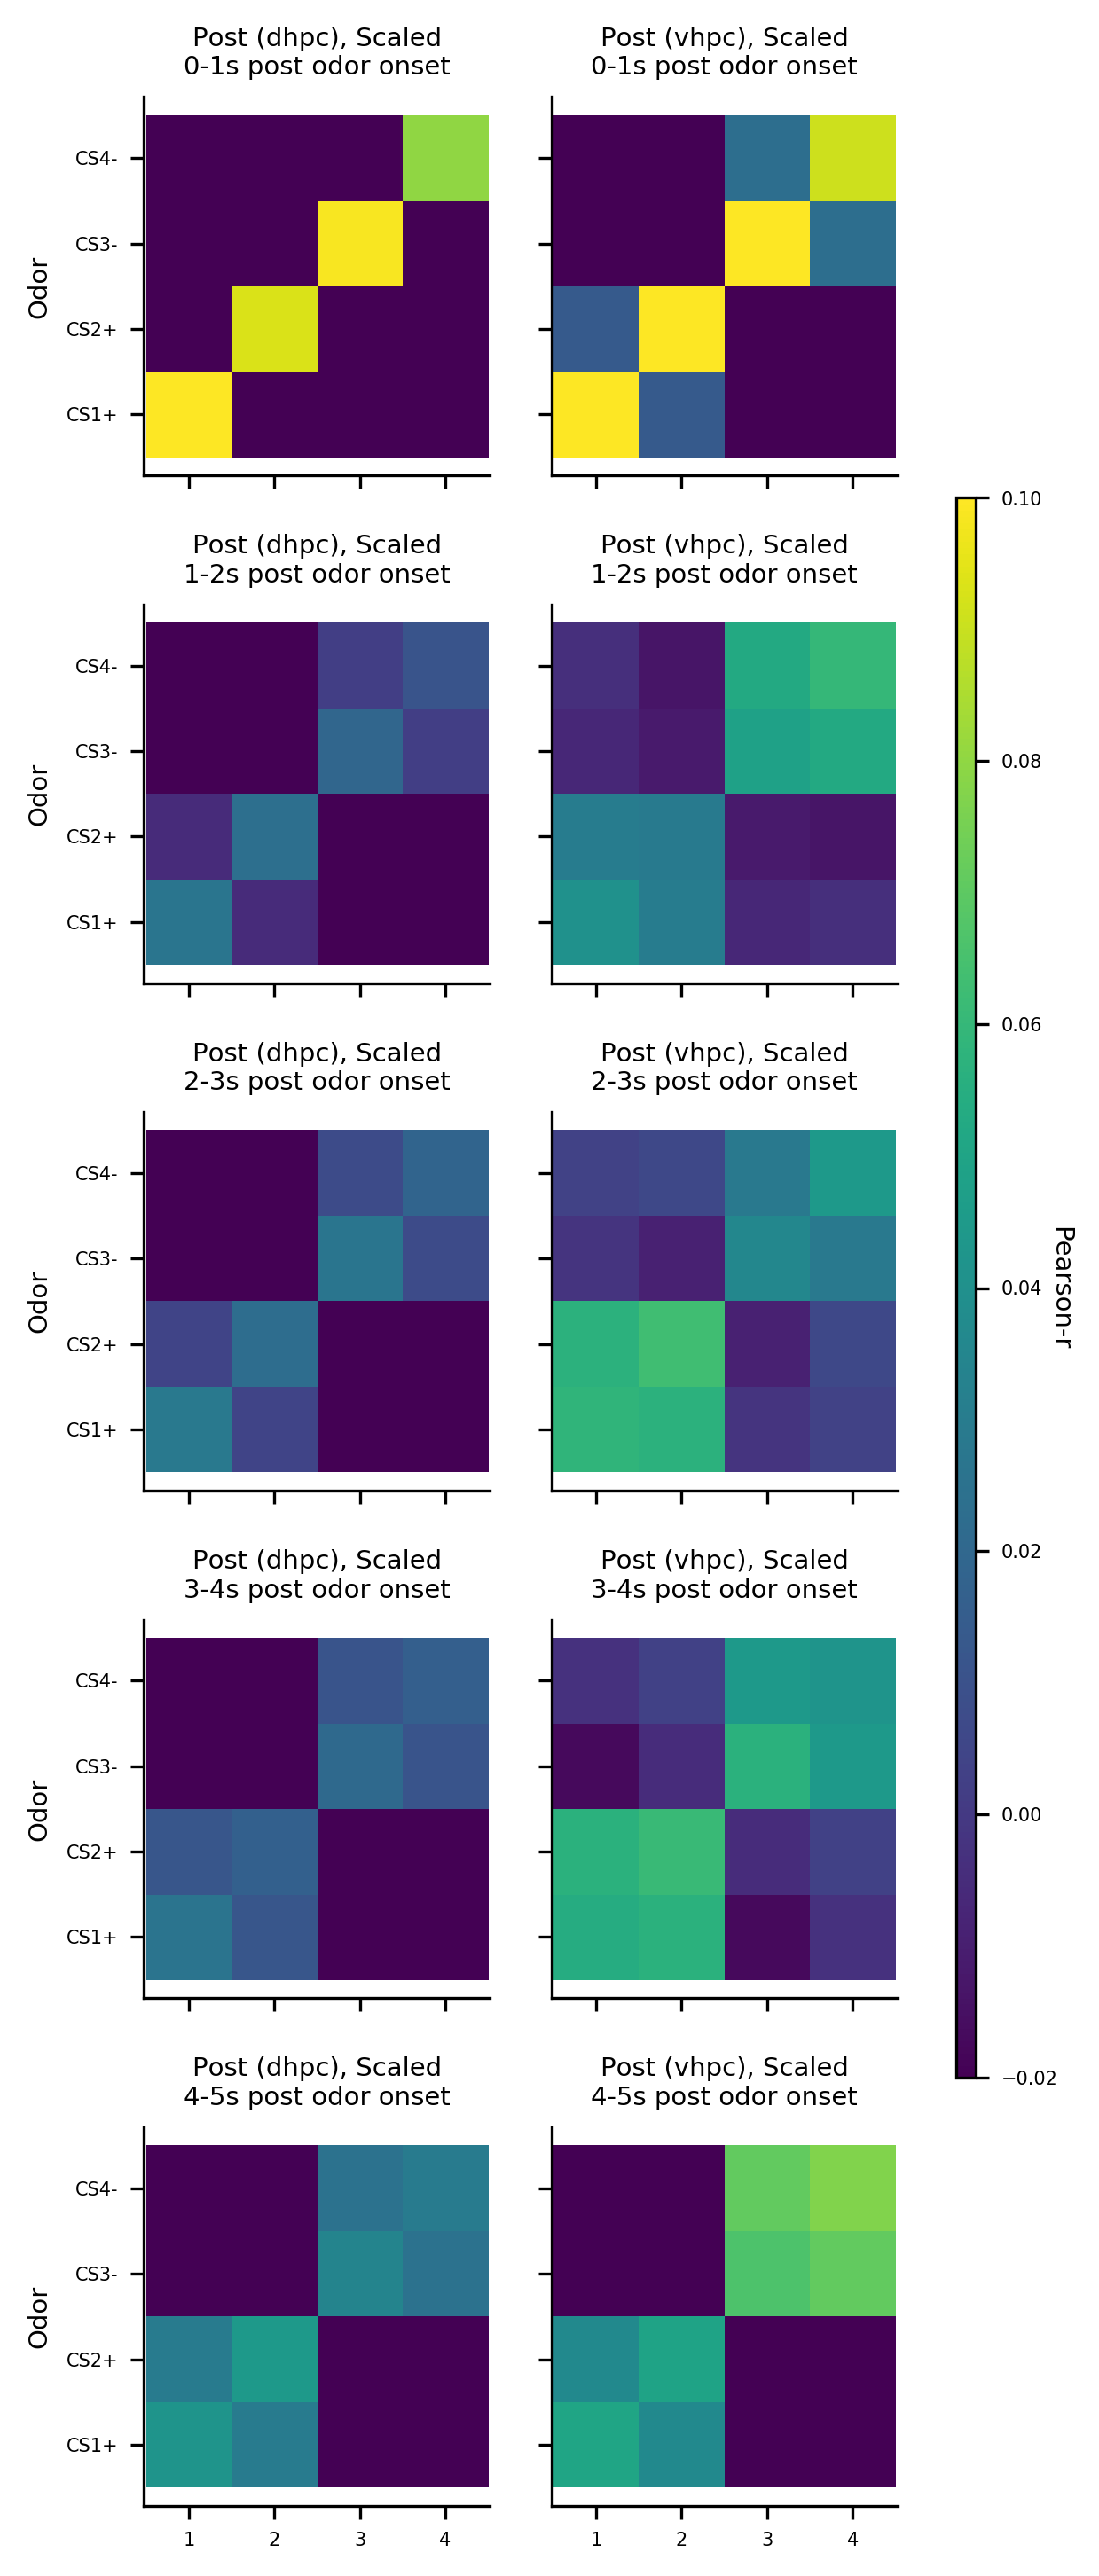

In [59]:
fig, ax = pl.subplots(5, 2, figsize=(3.7, 9.9), sharex=True, sharey=True)
for reg,y in zip(regions,range(2)):
    for t,x in zip(range(5,10),range(5)):
        im = ax[x][y].imshow(eval("scaled_values_%s_1s_post_%s"%(reg,t)), origin='lower', aspect='equal', vmin=-0.02, vmax=0.1, cmap=pl.cm.viridis)
        
        # pt.[y]nicer_plot(ax)
        ax[x][y].set_xlim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_xticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_xticklabels(pattern_ids)
        ax[x][y].set_ylim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_yticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_yticklabels(['CS1+','CS2+','CS3-','CS4-'])
        
        #ax[x][y].set_xlabel('Odor')
        ax[x][0].set_ylabel('Odor')
        ax[x][y].set_title('Post (%s), Scaled\n%s-%ss post odor onset'%(reg,str(t-5),str(t-4)))

ax[1][0] = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax[1][0])
ax[1][0].set_ylabel('Pearson-r',rotation=-90)
fig.tight_layout(pad=3)
#fig.savefig('../img/%s_vhpc.jpg'%NOTEBOOK_NAME)

In [125]:
import matplotlib

def heatmap(data, row_labels, col_labels, ax=None, cmap='viridis',
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = pl.gca()

    # Plot the heatmap
    im = ax.imshow(data, cmap, origin="lower", aspect='equal',**kwargs)

    # Create colorbar
    ##
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=7)
    ax.set_yticklabels(row_labels, fontsize=7)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
    #               labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    pl.setp(ax.get_xticklabels(), rotation=45, ha="center",
         rotation_mode="default")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1])-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0])-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=.3)
    ax.tick_params(axis='both', which='both', bottom=False, left=False,pad=-1)

    return im#, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

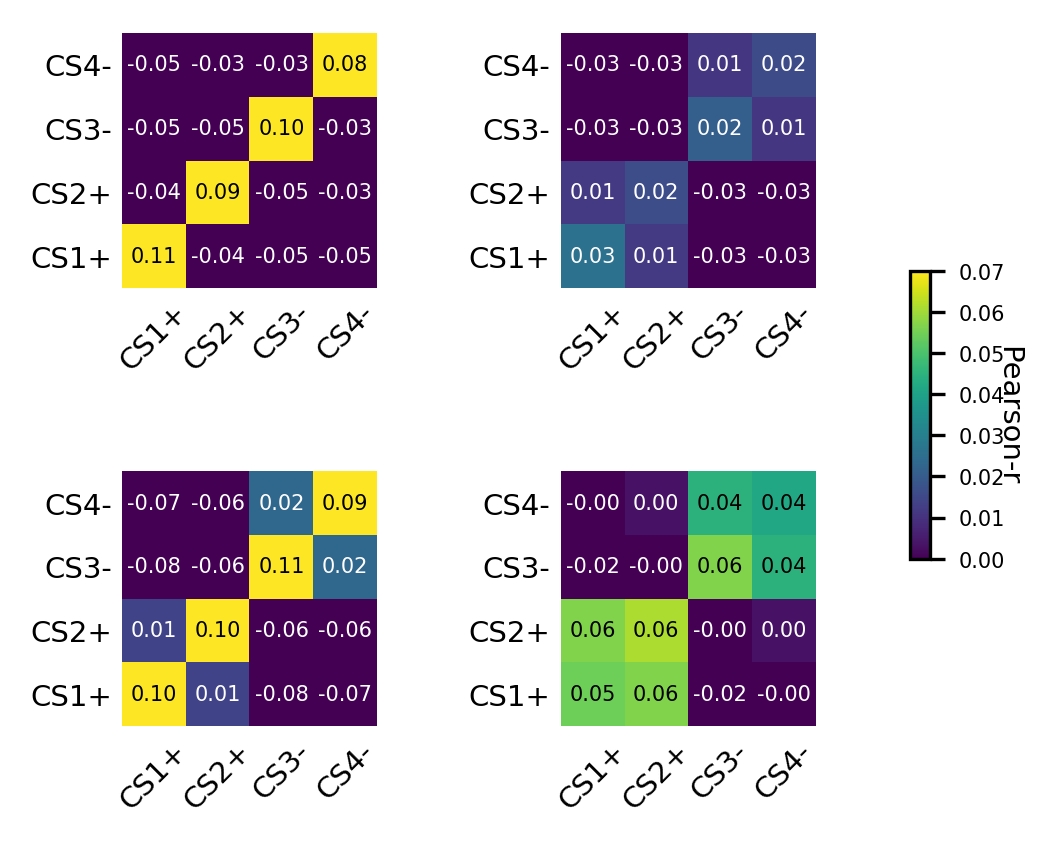

In [127]:
fig, ((ax0,ax1),(ax2,ax3)) = pl.subplots(2, 2, figsize=(3.2, 3.2))

for reg,y in zip(regions,range(2)):
    for t,x in zip([5,8],range(2)):
        z=2*y+x
        im=heatmap(eval("scaled_values_%s_1s_post_%s"%(reg,t)),(['CS1+','CS2+','CS3-','CS4-']),(['CS1+','CS2+','CS3-','CS4-']),
                  ax=eval('ax%s'%z),vmin=0,vmax=0.07,cmap=pl.cm.viridis)
        annotate_heatmap(im, valfmt="{x:.2f}", threshold=0.03,size=5)
        #im = ax[x][y].imshow(eval("scaled_values_%s_1s_post_%s"%(reg,t)), origin='lower', aspect='equal', vmin=-0.0, vmax=0.07, cmap=pl.cm.viridis)
        
        #ax[x][0].set_ylabel('Odor')
        #ax[x][y].set_title('Post (%s), Scaled\n%s-%ss post odor onset'%(reg,str(t-5),str(t-4)))
        
pl.tight_layout(pad=2)
ax1 = fig.add_axes((1, 0.35, 0.02, 0.3))
fig.colorbar(im, cax=ax1)
ax1.set_ylabel('Pearson-r',rotation=-90)
pl.show()
#fig.tight_layout(pad=3)
#fig.savefig('../figures/%s_CSTr_dv.pdf'%NOTEBOOK_NAME)

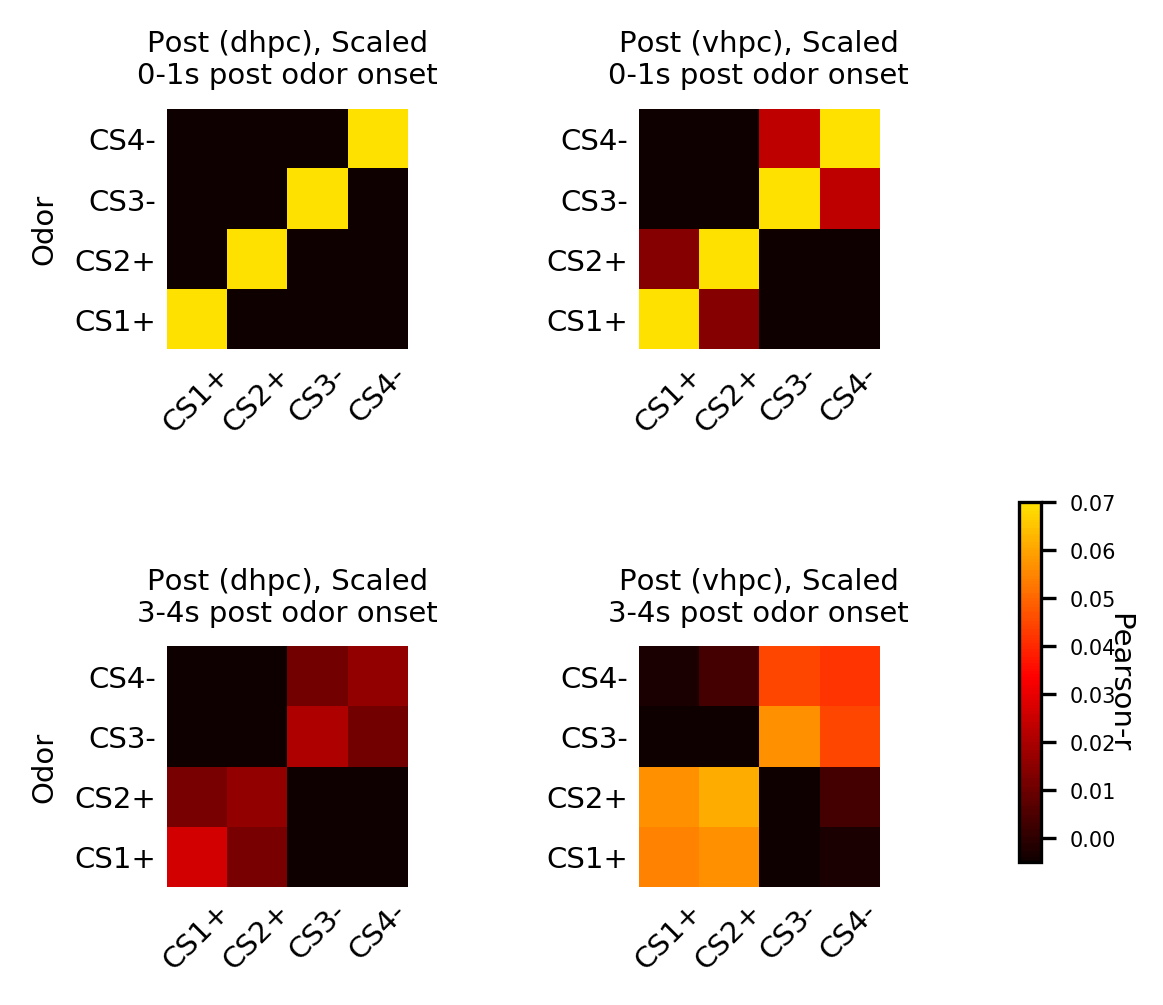

In [160]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap=cm.get_cmap('hot')
newcolors=cmap(np.linspace(0.01, 0.7, 128))
new_cmap = ListedColormap(newcolors)

fig, ax = pl.subplots(2, 2, figsize=(3.7, 4), sharex=False, sharey=False)
for reg,y in zip(regions,range(2)):
    for t,x in zip([5,8],range(2)):
        im = ax[x][y].imshow(eval("scaled_values_%s_1s_post_%s"%(reg,t)), origin='lower', aspect='equal', vmin=-0.005, vmax=0.07,
                             cmap=new_cmap)
        
        # pt.[y]nicer_plot(ax)
        ax[x][y].set_xlim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_xticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_xticklabels(pattern_ids)
        ax[x][y].set_ylim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_yticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_yticklabels(['CS1+','CS2+','CS3-','CS4-'],fontsize=7)
        ax[x][y].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'],fontsize=7,rotation=45)
        
        #ax[x][y].set_xlabel('Odor')
        ax[x][0].set_ylabel('Odor')
        ax[x][y].set_title('Post (%s), Scaled\n%s-%ss post odor onset'%(reg,str(t-5),str(t-4)))
        
        # Turn spines off and create white grid.
        for edge, spine in ax[x][y].spines.items():
            spine.set_visible(False)
    
        ax[x][y].grid(which="minor", color="w", linestyle='-', linewidth=.5)
        ax[x][y].tick_params(axis='both', which='both', bottom=False, left=False,pad=-1)

ax[1][0] = fig.add_axes((1, 0.2, 0.02, 0.3))
fig.colorbar(im, cax=ax[1][0])
ax[1][0].set_ylabel('Pearson-r',rotation=-90)
fig.tight_layout(pad=3)
fig.savefig('../figures/%s_CSTr_dv.pdf'%NOTEBOOK_NAME)

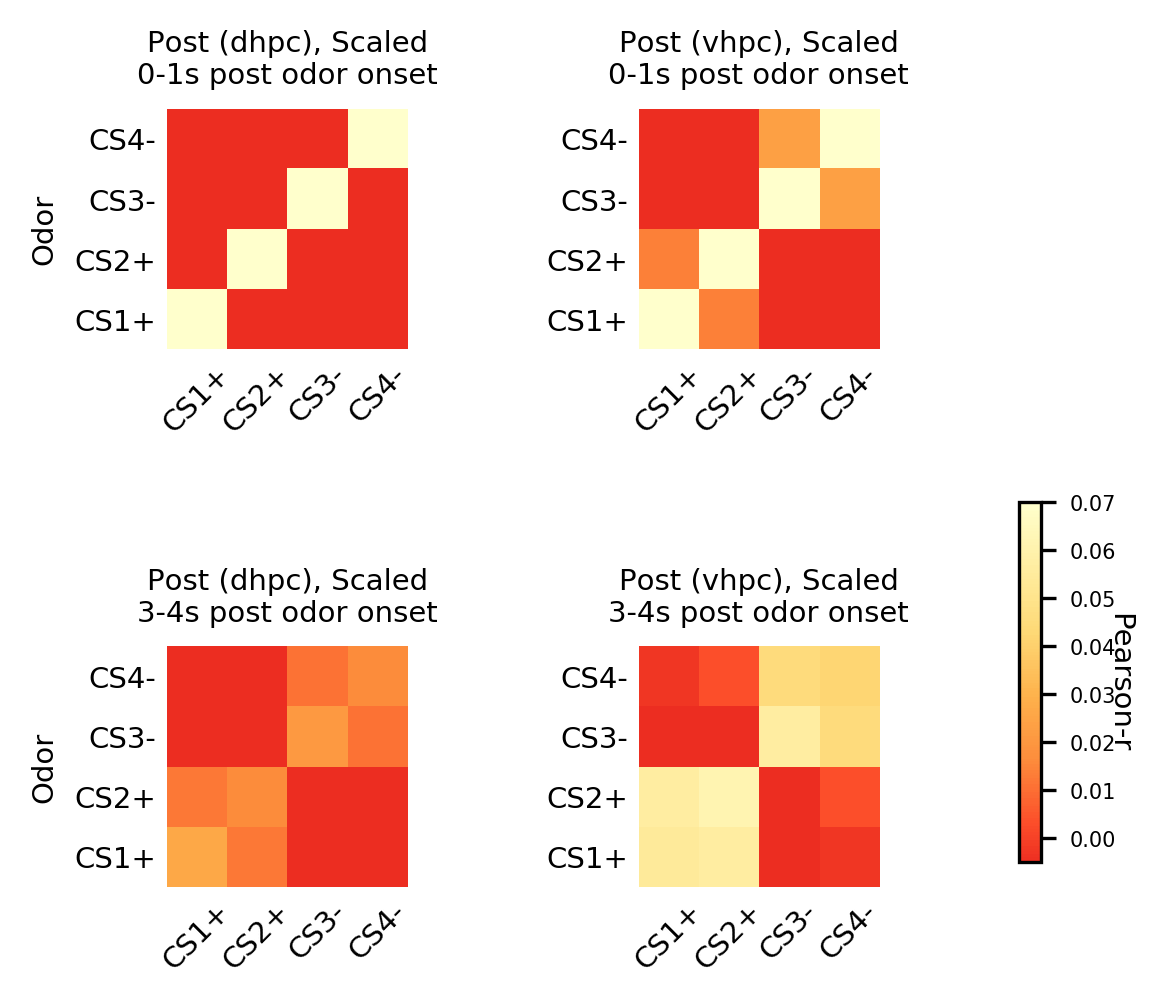

In [157]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap=cm.get_cmap('YlOrRd')
newcolors=cmap(np.linspace(0.7, 0, 128))
new_cmap = ListedColormap(newcolors)

fig, ax = pl.subplots(2, 2, figsize=(3.7, 4), sharex=False, sharey=False)
for reg,y in zip(regions,range(2)):
    for t,x in zip([5,8],range(2)):
        im = ax[x][y].imshow(eval("scaled_values_%s_1s_post_%s"%(reg,t)), origin='lower', aspect='equal', vmin=-0.005, vmax=0.07,
                             cmap=new_cmap)
        
        # pt.[y]nicer_plot(ax)
        ax[x][y].set_xlim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_xticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_xticklabels(pattern_ids)
        ax[x][y].set_ylim(-0.5, eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_yticks(range(eval("scaled_values_%s_1s_post_%s"%(reg,t)).shape[0]))
        ax[x][y].set_yticklabels(['CS1+','CS2+','CS3-','CS4-'],fontsize=7)
        ax[x][y].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'],fontsize=7,rotation=45)
        
        #ax[x][y].set_xlabel('Odor')
        ax[x][0].set_ylabel('Odor')
        ax[x][y].set_title('Post (%s), Scaled\n%s-%ss post odor onset'%(reg,str(t-5),str(t-4)))
        
        # Turn spines off and create white grid.
        for edge, spine in ax[x][y].spines.items():
            spine.set_visible(False)
    
        ax[x][y].grid(which="minor", color="w", linestyle='-', linewidth=.5)
        ax[x][y].tick_params(axis='both', which='both', bottom=False, left=False,pad=-1)

ax[1][0] = fig.add_axes((1, 0.2, 0.02, 0.3))
fig.colorbar(im, cax=ax[1][0])
ax[1][0].set_ylabel('Pearson-r',rotation=-90)
fig.tight_layout(pad=3)
fig.savefig('../figures/%s_CSTr_dv.pdf'%NOTEBOOK_NAME)

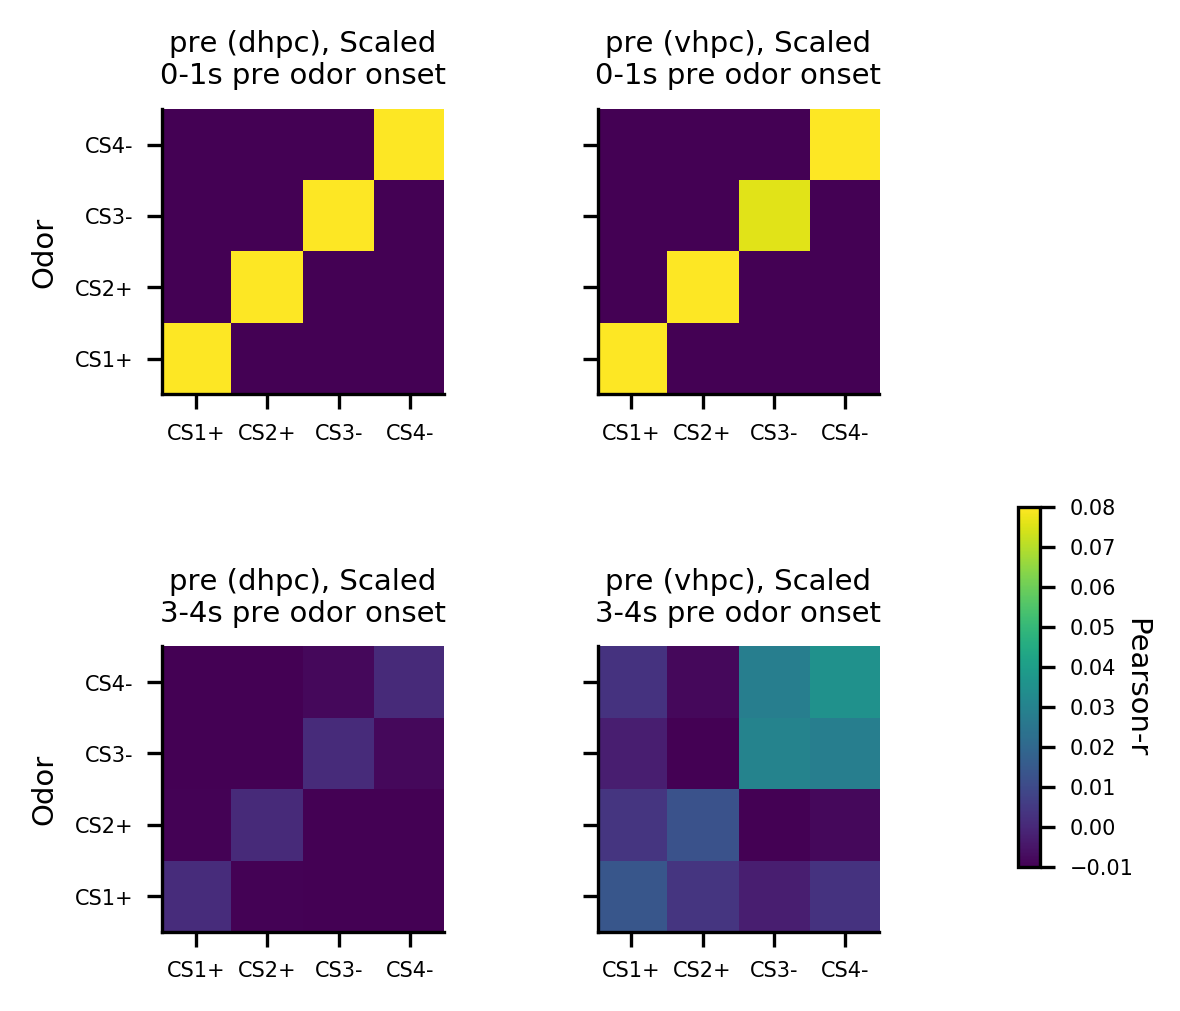

In [76]:
fig, ax = pl.subplots(2, 2, figsize=(3.7, 4), sharex=False, sharey=True)
for reg,y in zip(regions,range(2)):
    for t,x in zip([5,8],range(2)):
        im = ax[x][y].imshow(eval("scaled_values_%s_1s_pre_%s"%(reg,t)), origin='lower', aspect='equal', vmin=-0.01, vmax=0.08, cmap=pl.cm.viridis)
        
        # pt.[y]nicer_plot(ax)
        ax[x][y].set_xlim(-0.5, eval("scaled_values_%s_1s_pre_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_xticks(range(eval("scaled_values_%s_1s_pre_%s"%(reg,t)).shape[0]))
        ax[x][y].set_xticklabels(pattern_ids)
        ax[x][y].set_ylim(-0.5, eval("scaled_values_%s_1s_pre_%s"%(reg,t)).shape[0]-0.5)
        ax[x][y].set_yticks(range(eval("scaled_values_%s_1s_pre_%s"%(reg,t)).shape[0]))
        ax[x][y].set_yticklabels(['CS1+','CS2+','CS3-','CS4-'])
        ax[x][y].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'])
        
        #ax[x][y].set_xlabel('Odor')
        ax[x][0].set_ylabel('Odor')
        ax[x][y].set_title('pre (%s), Scaled\n%s-%ss pre odor onset'%(reg,str(t-5),str(t-4)))

ax[1][0] = fig.add_axes((1, 0.2, 0.02, 0.3))
fig.colorbar(im, cax=ax[1][0])
ax[1][0].set_ylabel('Pearson-r',rotation=-90)
fig.tight_layout(pad=3)
fig.savefig('../figures/%s_CSTr_dv.jpg'%NOTEBOOK_NAME)

In [29]:
for sess in sessions:
    for reg in 'dhpc','vhpc':
        for t in range(16):
            exec("corrs_%s_1s_%s_%s = {}"%(reg,sess,t))
            for ani in eval("scaled_patterns_%s_1s_%s_%s.keys()"%(reg,sess,t)):
                exec("all_patterns_%s_%s = np.concatenate([scaled_patterns_%s_1s_%s_%s[ani][labels_%s_%s[ani]==i] for i in range(1, 5)])"%(reg,sess,reg,sess,t,reg,sess))
                #print [eval("(labels_%s_%s[ani]==i)"%(sess,reg)).sum() for i in range(1, 5)]
                exec("corrs_%s_1s_%s_%s[ani] = [sstats.pearsonr(p1, p2)[0] for p1, p2 in product(all_patterns_%s_%s, repeat=2)]"%(reg,sess,t,reg,sess))
                print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [38]:
for ani in corrs_dhpc_1s_expo_1.keys():
    print ani, np.shape(corrs_dhpc_1s_expo_0[ani])

dhpc37 (3600,)
dNAc3 (3600,)
dhpc40 (3600,)
dhpc39 (3600,)
dNAc4 (3600,)


In [43]:
no_c18m9_expo_animals='94', '96', '98', '99', '100', '104', 'vNAc7'
no_dhpc37_pre_animals= 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'
for reg in 'dhpc','vhpc':
    for sess in sessions:
        for t in range(16):
            if sess=='expo' and reg =='vhpc': #c18m9 is missing a trial during expo, so omit him or else messes everything up
                exec("corrs_%s_1s_%s_%s_mean = np.mean([corrs_%s_1s_%s_%s[ani] for ani in no_c18m9_expo_animals], 0).reshape(len(pattern_ids)*30, -1)"%(reg,sess,t,reg,sess,t))
            elif sess=='pre' and reg =='dhpc': #dhpc37 correlations are off the chart for pre, so omit 
                exec("corrs_%s_1s_%s_%s_mean = np.mean([corrs_%s_1s_%s_%s[ani] for ani in no_dhpc37_pre_animals], 0).reshape(len(pattern_ids)*30, -1)"%(reg,sess,t,reg,sess,t))
            else:    
                exec("corrs_%s_1s_%s_%s_mean = np.mean([corrs_%s_1s_%s_%s[ani] for ani in %s_%s_animals], 0).reshape(len(pattern_ids)*30, -1)"%(reg,sess,t,reg,sess,t,reg,sess))
#corrs_d = np.mean([corrs[ani] for ani in dhpc_animals], 0).reshape(len(pattern_ids)*30, -1)
#corrs_v = np.mean([corrs[ani] for ani in vhpc_animals], 0).reshape(len(pattern_ids)*30, -1)

In [52]:
for key in corrs_vhpc_1s_post_4.keys():
    print len(corrs_vhpc_1s_post_4[key])

14400
14400
14400
14400
14400
14400
14400
14400


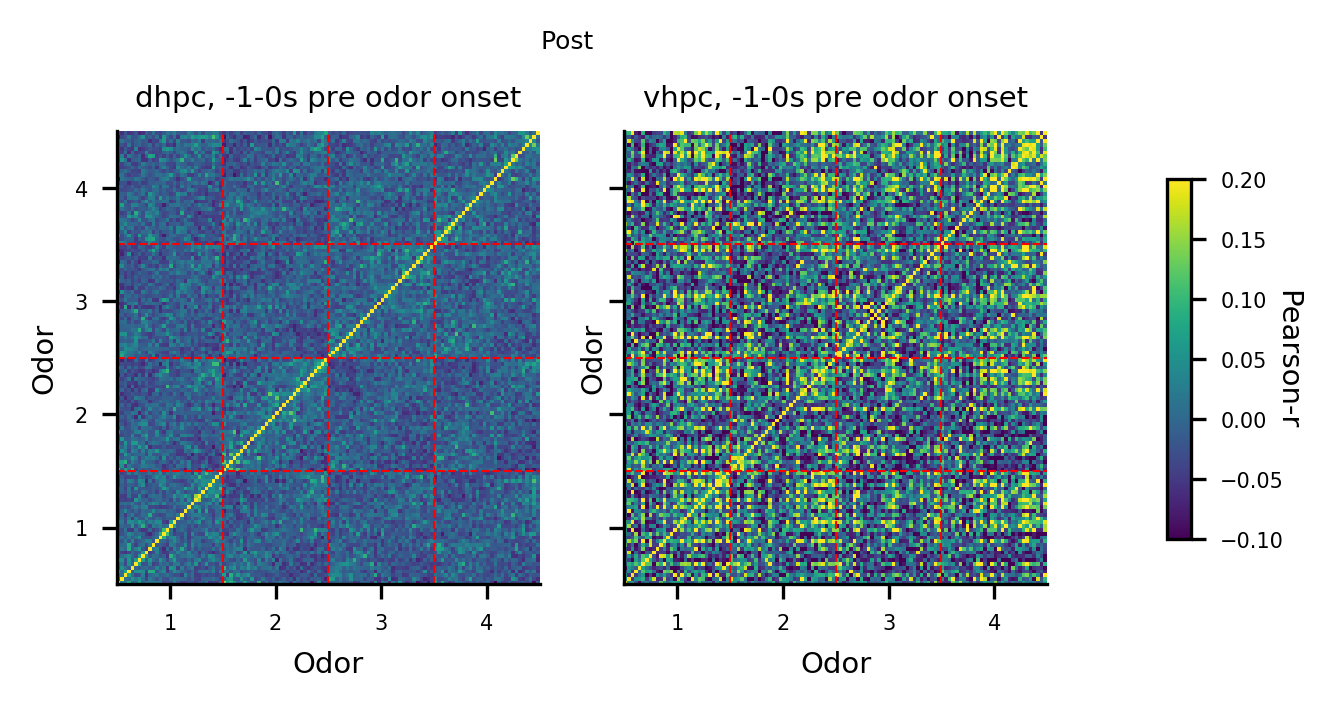

In [36]:
tb = 4 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', -1-0s pre odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('Post',y=1.05)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_baseline_late.pdf'%NOTEBOOK_NAME)

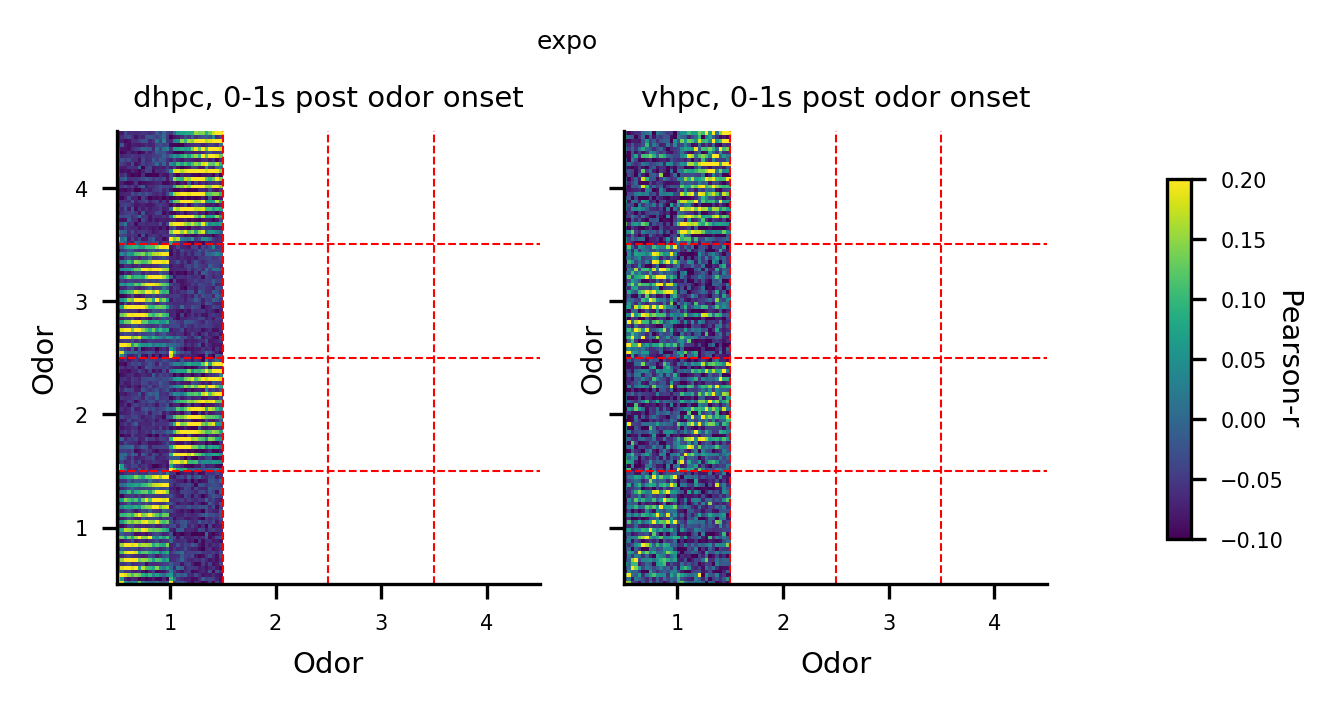

In [60]:
tb = 5 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_expo_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 0-1s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('expo',y=1.05)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_odor_Early.pdf'%NOTEBOOK_NAME)

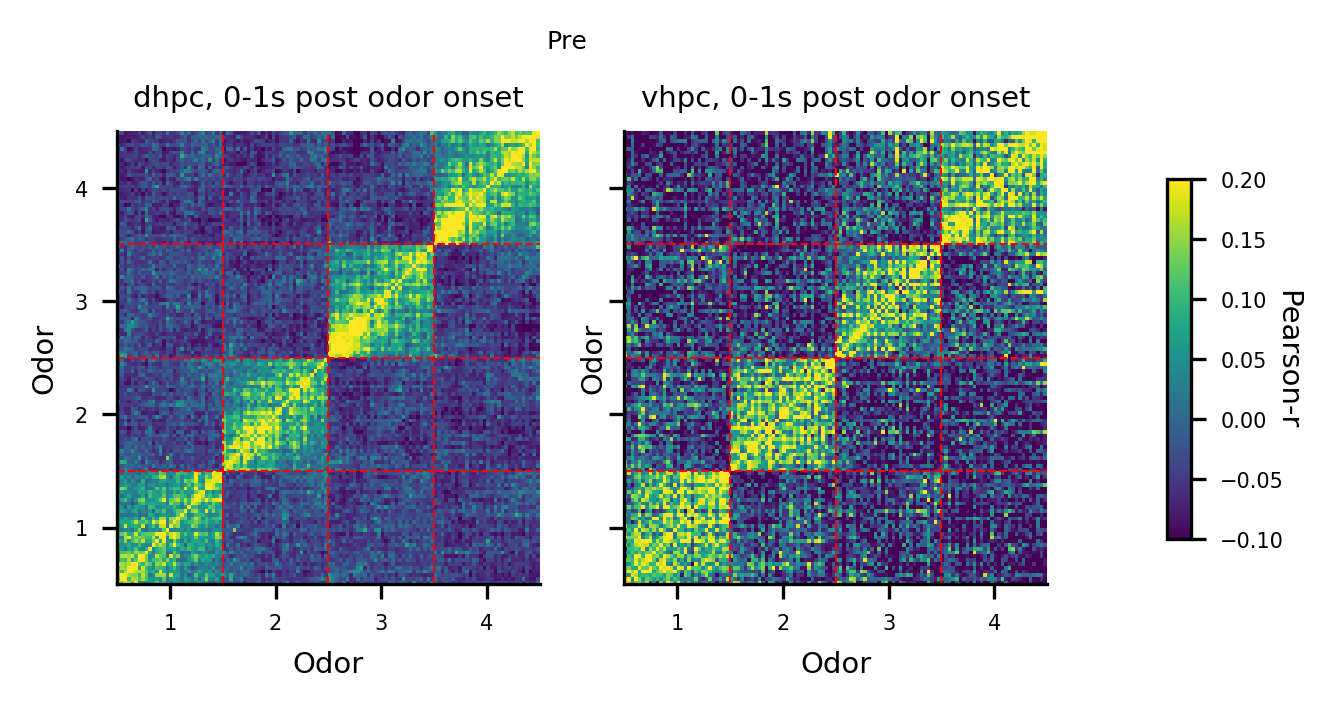

In [44]:
tb = 5 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_pre_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 0-1s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('Pre',y=1.05)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_odor_Early.pdf'%NOTEBOOK_NAME)

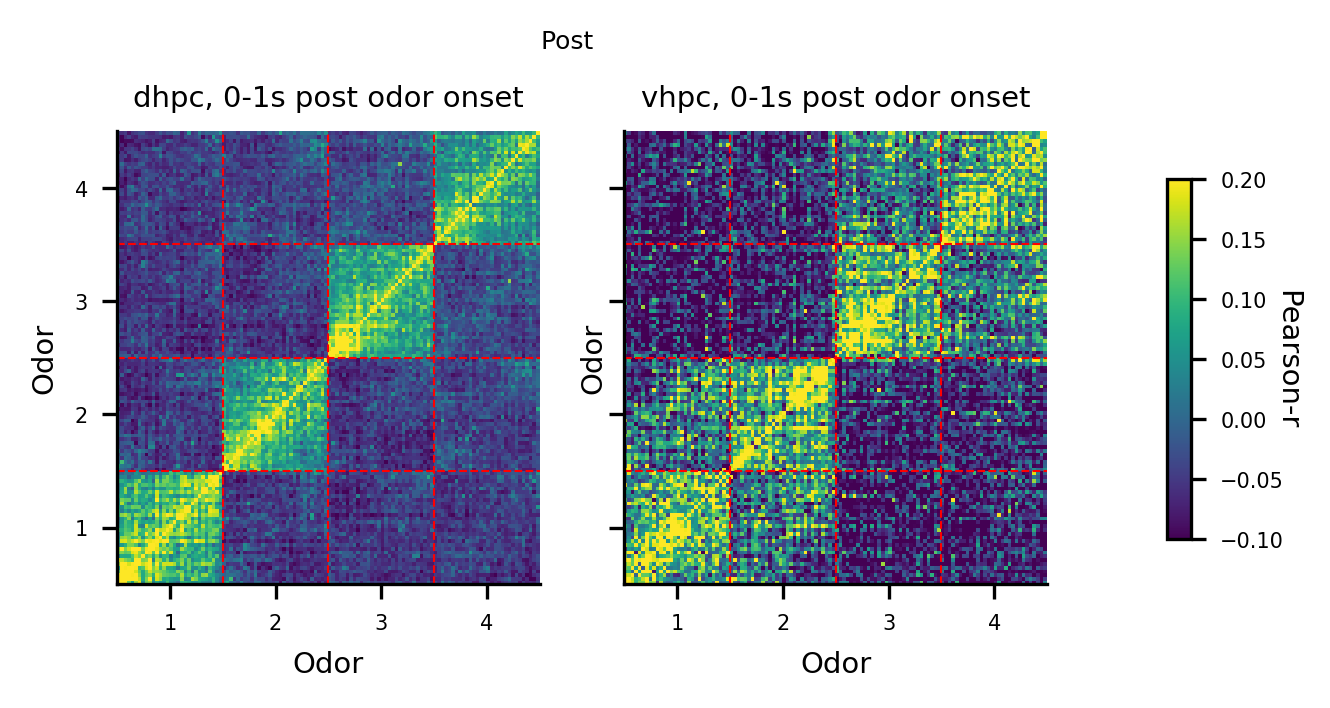

In [117]:
tb = 5 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 0-1s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('Post',y=1.05)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_odor_late.pdf'%NOTEBOOK_NAME)

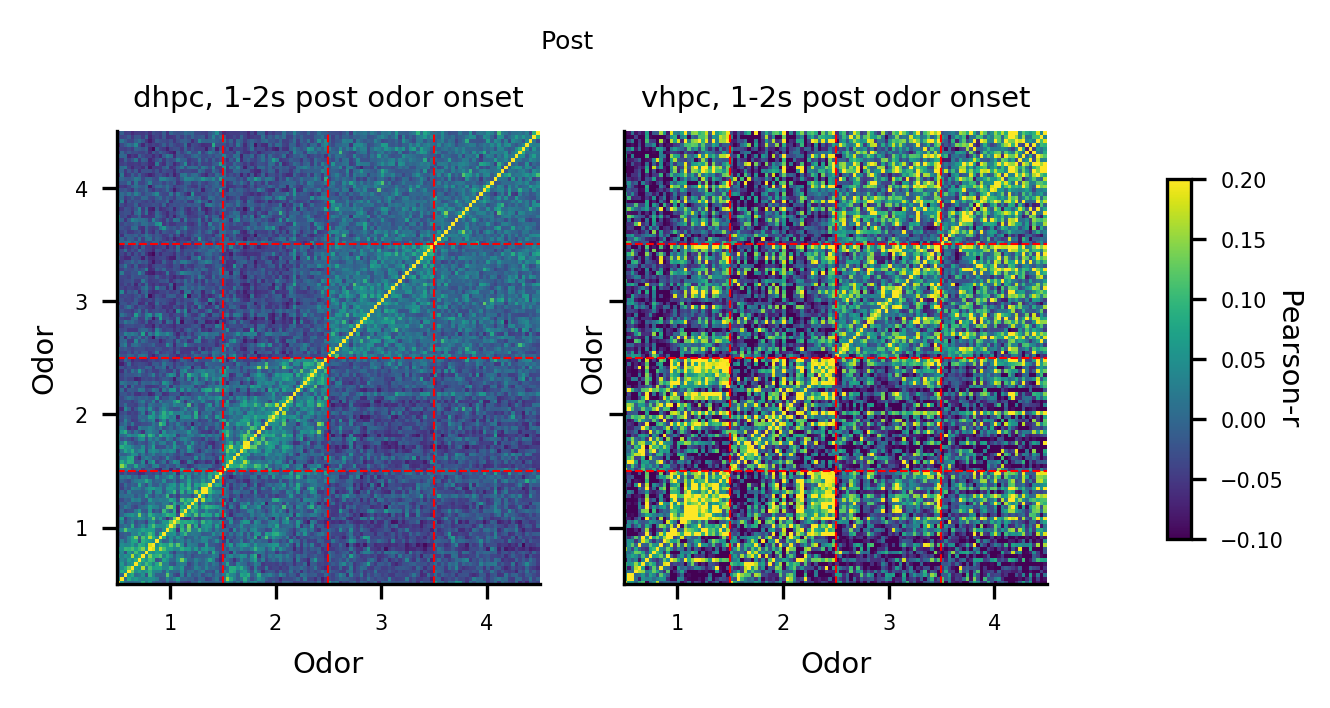

In [116]:
tb = 6 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 1-2s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('Post',y=1.05)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
#fig.savefig('../figures/%s_BIG_odor_late.pdf'%NOTEBOOK_NAME)

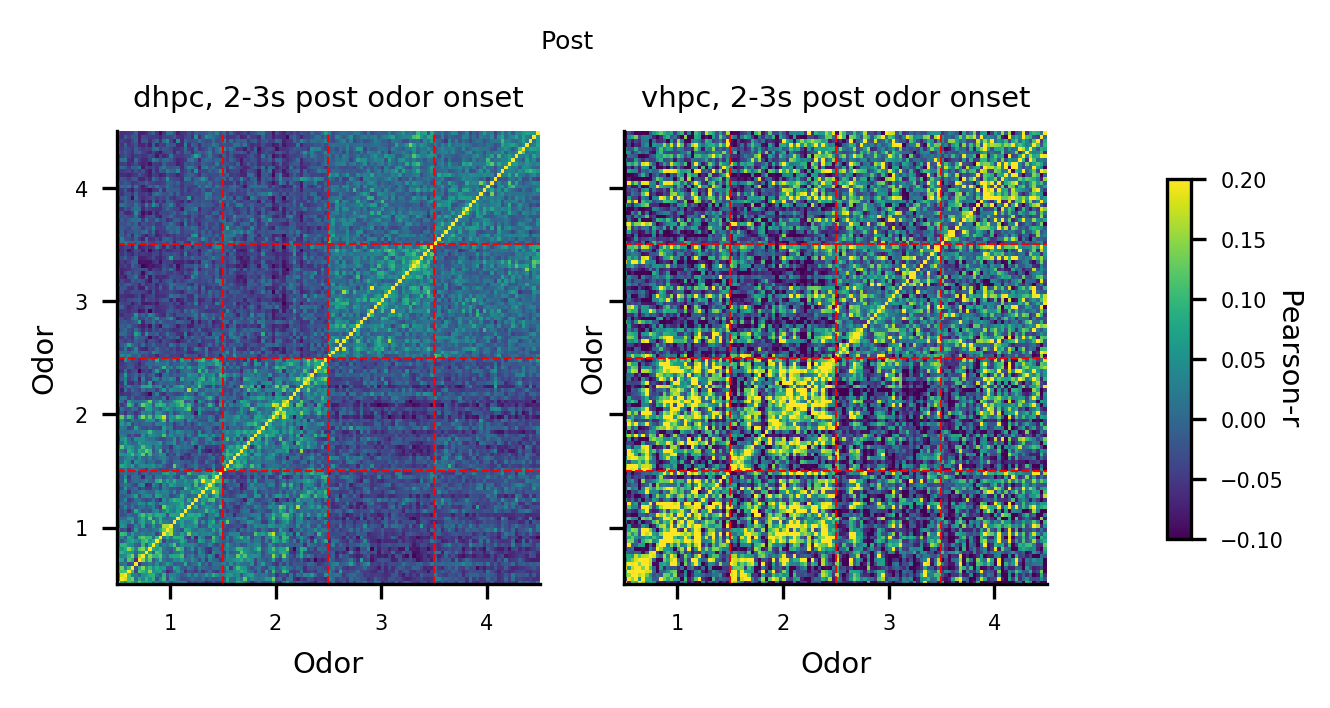

In [115]:
tb = 7 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 2-3s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)
fig.suptitle('Post',y=1.05)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
#fig.savefig('../figures/%s_BIG_odor_late.pdf'%NOTEBOOK_NAME)

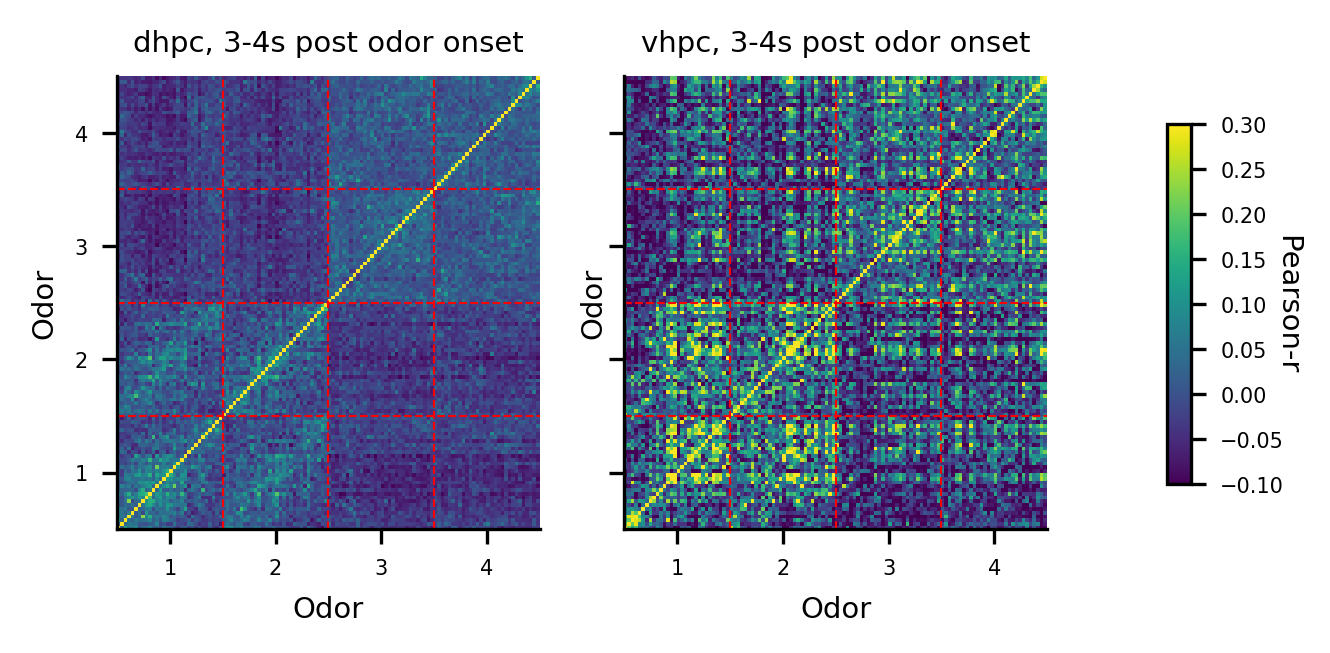

In [61]:
tb = 8 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.3)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 3-4s post odor onset')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_trace_late.pdf'%NOTEBOOK_NAME)

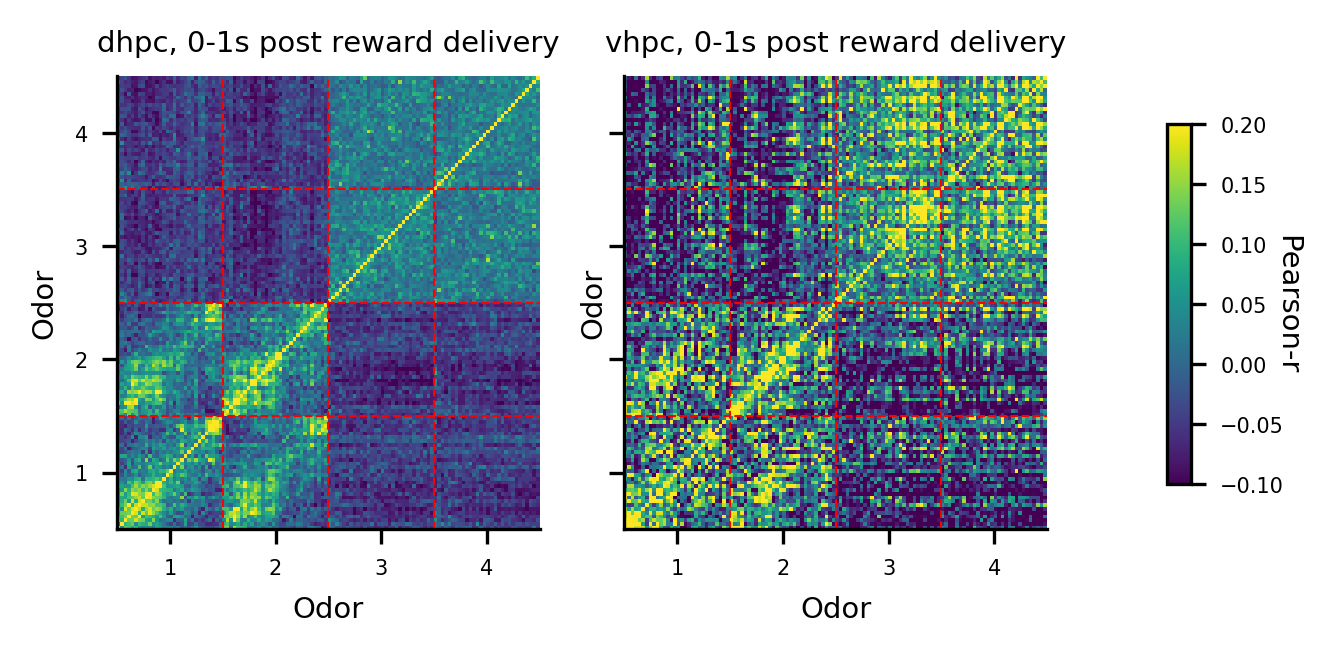

In [101]:
tb = 9 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 0-1s post reward delivery')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_rew_late.pdf'%NOTEBOOK_NAME)

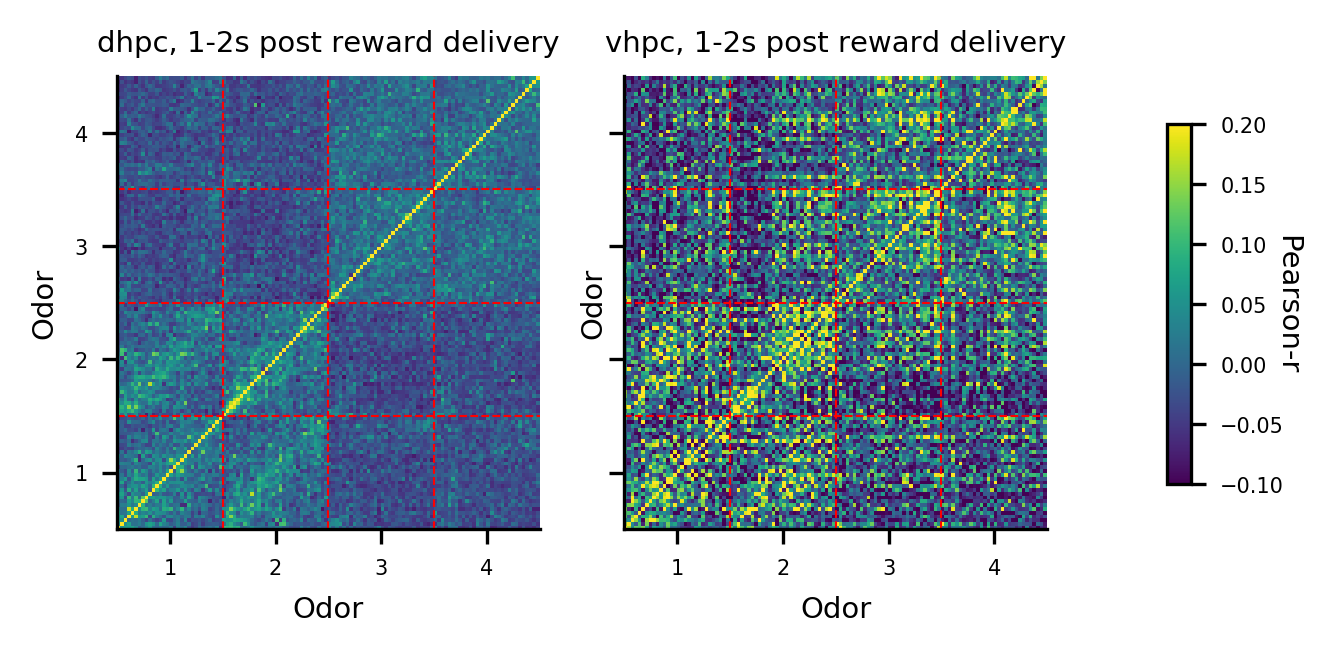

In [118]:
tb = 10 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_%s_1s_post_%s_mean"%(reg,tb)),vmin=-0.1, vmax=0.2)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0], eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids))+eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_%s_1s_post_%s_mean"%(reg,tb)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', 1-2s post reward delivery')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
#fig.savefig('../figures/%s_BIG_rew_late.pdf'%NOTEBOOK_NAME)

In [93]:
save_workspace(db)

Could not store variable 'ip'. Skipping...
Could not store variable 'preprocessing'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
